# __Titanic: Machine Learning From Disaster__

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore")

## Exploring the data

In [2]:
data = pd.read_csv("./data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical data Transformation

### Ticket Transform

In [5]:
data["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

We don't have information about the meaning of the letters in the ticket, so we will start by extractim the ticket number (The one that doesn´t contain any letters).

In [6]:
data["Ticket Num"] = data["Ticket"].str.replace('[A-Za-z]', '', regex=True)
data["Ticket Num"] = data["Ticket Num"].str.replace('[/,.]', '', regex=True)

In [7]:
for i in range(len(data)):
    str_list = data["Ticket Num"][i].split()
    if len(str_list)==2:
        data["Ticket Num"][i] = str_list[1]
    elif len(str_list)==0:
        data["Ticket Num"][i] = 0

In [8]:
data["Ticket Num"] = data["Ticket Num"].astype(int)

## Numerical data Visualization

In [9]:
def measures_of_central_tendency(numerical_column):
    print(numerical_column)
    print(f'Mean: {data[numerical_column].mean()}')
    print(f'Median: {data[numerical_column].median()}')
    print(f'Mode: {data[numerical_column].mode()}')
    print("-"*40)
    
def single_num_column_graphs(numerical_column):
    fix, ax = plt.subplots(1,2, figsize=(15,4))
    
    sns.set(style="whitegrid")
    
    sns.histplot(data=data, x=numerical_column, hue="Survived", kde=True, ax=ax[0])
    
    ax[0].set_title(f'{numerical_column} Histogram')
    
    sns.boxplot(data=data, x="Survived", y=numerical_column, ax=ax[1])
    
    ax[1].set_title(f'{numerical_column} Boxplot')
    
    plt.show()
    
    
def plot_histograms(numerical_column_list):
    num_vars = len(numerical_column_list)
    num_rows = (num_vars + 1) // 2  
    fig, ax = plt.subplots(num_rows, 2, figsize=(15, 4 * num_rows))
    sns.set(style="whitegrid")

    for i, column in enumerate(numerical_column_list):
        row = i // 2
        col = i % 2
        sns.histplot(data=data, x=column, ax=ax[row, col], hue="Survived", kde=True)
        ax[row, col].set_title(f"{column} Histogram")

    plt.tight_layout()
    plt.show()
    
def plot_boxplots(numerical_column_list):
    num_vars = len(numerical_column_list)
    num_rows = (num_vars + 1) // 2  
    fig, ax = plt.subplots(num_rows, 2, figsize=(15, 4 * num_rows))
    sns.set(style="whitegrid")

    for i, column in enumerate(numerical_column_list):
        row = i // 2
        col = i % 2
        sns.boxplot(data=data, x="Survived", y=column, ax=ax[row, col])
        ax[row, col].set_title(f"{column} Boxplot")

    plt.tight_layout()
    plt.show()

In [10]:
numerical_columns = ["Age", "Fare", "Parch", "SibSp", "Ticket Num", "Survived"]

In [11]:
for column in numerical_columns:
    measures_of_central_tendency(column)

Age
Mean: 29.69911764705882
Median: 28.0
Mode: 0    24.0
Name: Age, dtype: float64
----------------------------------------
Fare
Mean: 32.204207968574636
Median: 14.4542
Mode: 0    8.05
Name: Fare, dtype: float64
----------------------------------------
Parch
Mean: 0.38159371492704824
Median: 0.0
Mode: 0    0
Name: Parch, dtype: int64
----------------------------------------
SibSp
Mean: 0.5230078563411896
Median: 0.0
Mode: 0    0
Name: SibSp, dtype: int64
----------------------------------------
Ticket Num
Mean: 296989.12008978677
Median: 112058.0
Mode: 0      1601
1      2343
2    347082
Name: Ticket Num, dtype: int64
----------------------------------------
Survived
Mean: 0.3838383838383838
Median: 0.0
Mode: 0    0
Name: Survived, dtype: int64
----------------------------------------


* "Parch" and "SibSp" are integer values, both tending to 0. They need more analysis to draw conclusions.
* "Fare" and "Ticket Num" have a strange mean compared to their median and mode, maybe there are some outliers.

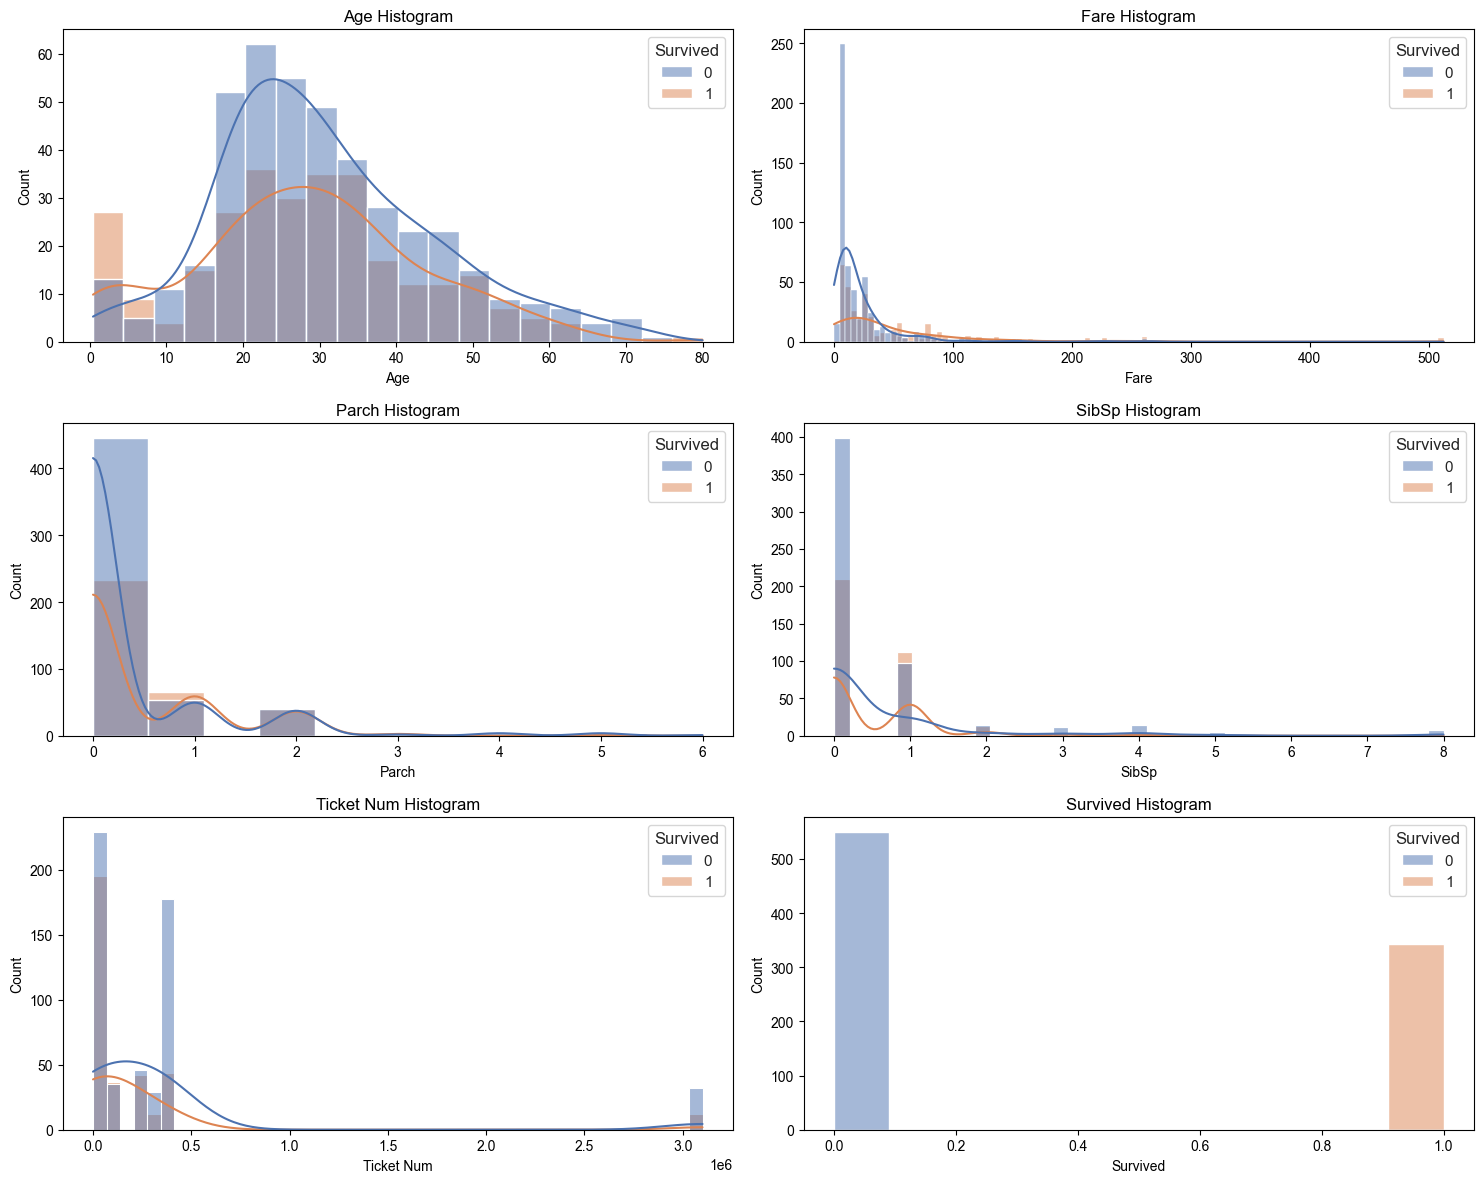

In [12]:
plot_histograms(numerical_columns)

* As we could see, Age has a relatively normal distribution, while SibSp and Parch are difficult to assess due to their nature.
* Fare has a left-skewed distribution. We will not rescale it as we will use random forest at first.
* Ticket Num has some outliers, we will manage to treat them later.

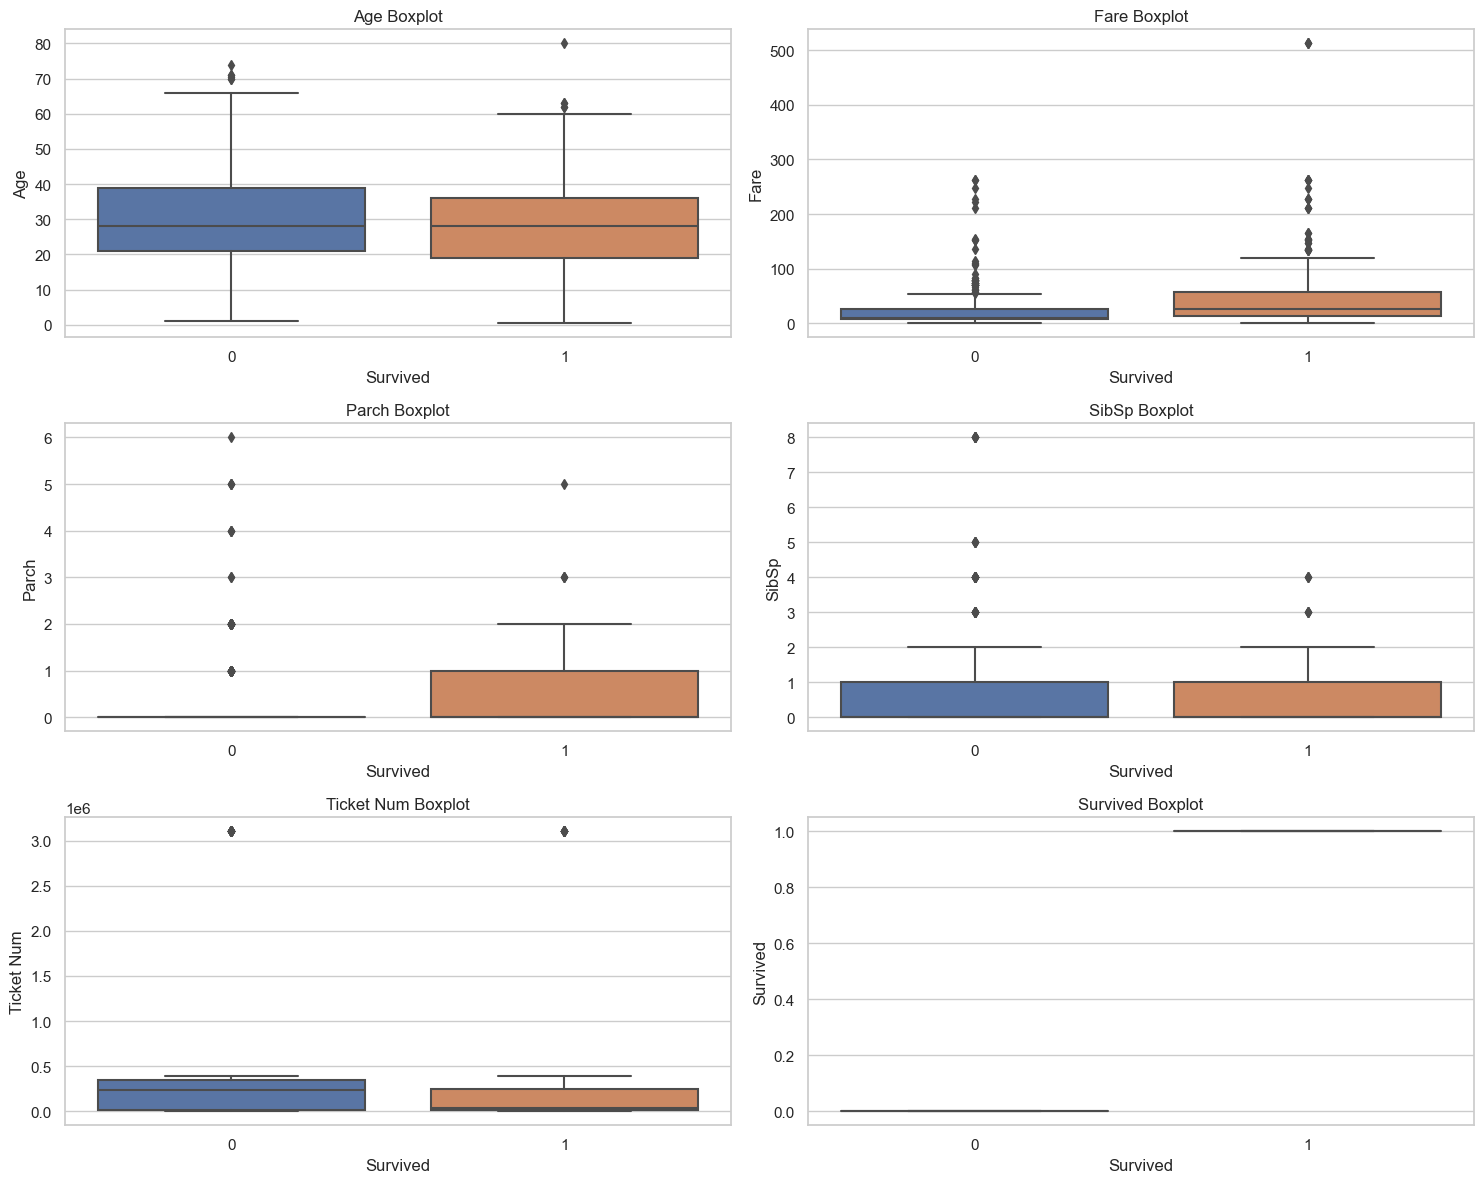

In [13]:
plot_boxplots(numerical_columns)

* We see some low relation between the age and the survivance, thoug its not too much. Mabe we can transform the data to categorical and get better results later.
* Also we see correlation between Parch and survival while not between sibsp and survival. As the concept of sibsp and parch is "Family", we can sum them for better generalization.
* Fare seems to have a huge outlier, over 500. We must treat this in order to the model not bias itself with this variable. Also, we can see some correlation between fare and survival.
* At first, we observe a some biased graphs with no strong correlation, so we will work on removing the outliers.

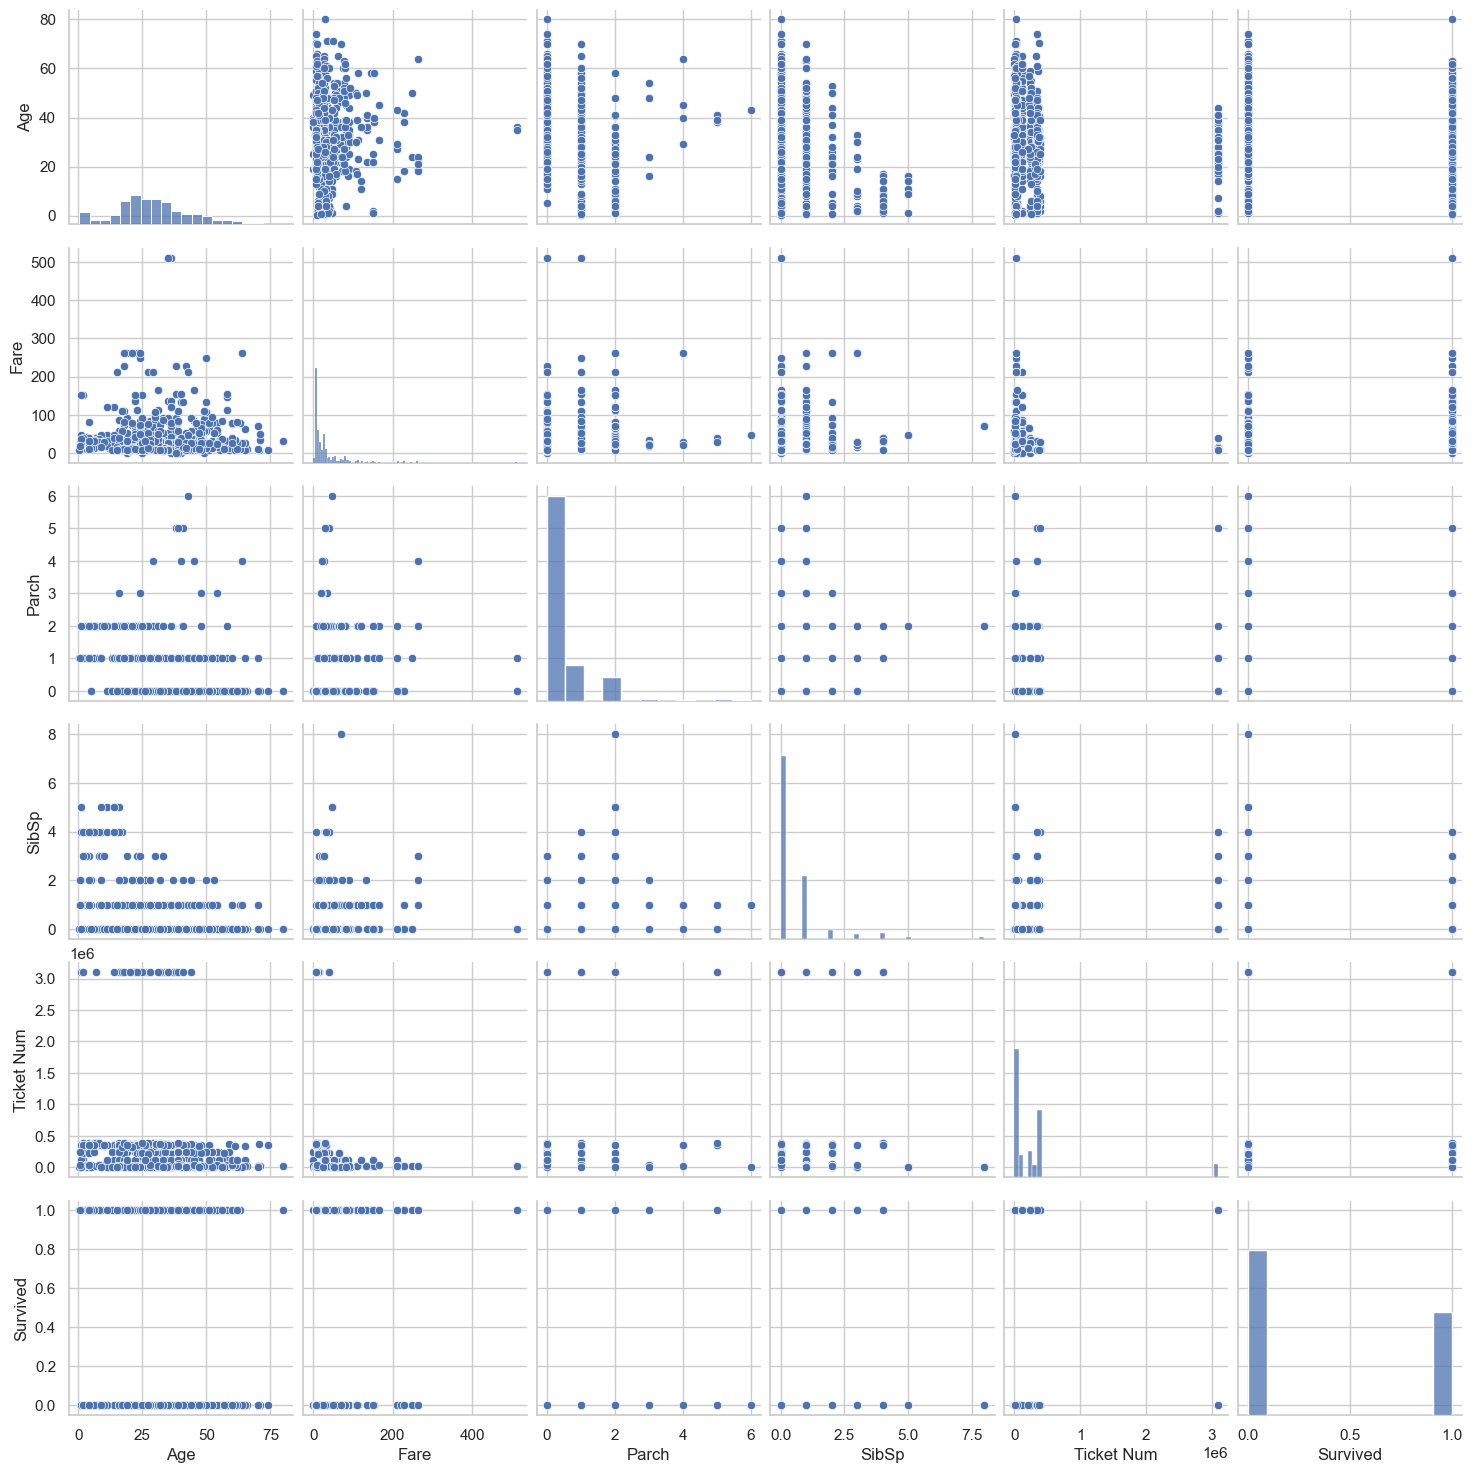

In [14]:
sns.pairplot(data.filter(items=numerical_columns))

We don't see any strong correlation between any of the numerical data. We will validate this with a correlation matrix.

### Family Size Column creation

In [15]:
data["Family Size"] = data["SibSp"]+data["Parch"]

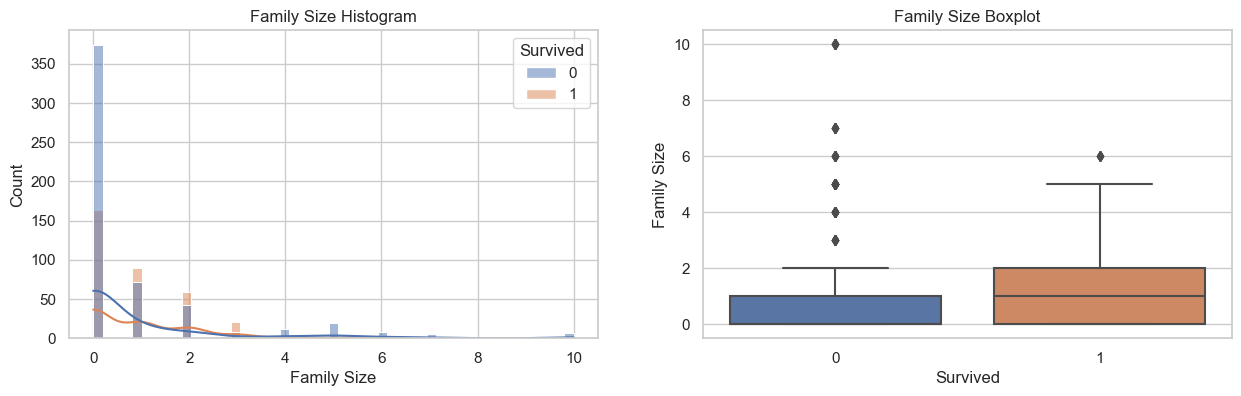

In [16]:
single_num_column_graphs("Family Size")

Now we see a more informative graphic using Family Size.

##### Ticket Transform

In [17]:
## Handling Ticket Outliers
data = data[data["Ticket Num"]<3e6]

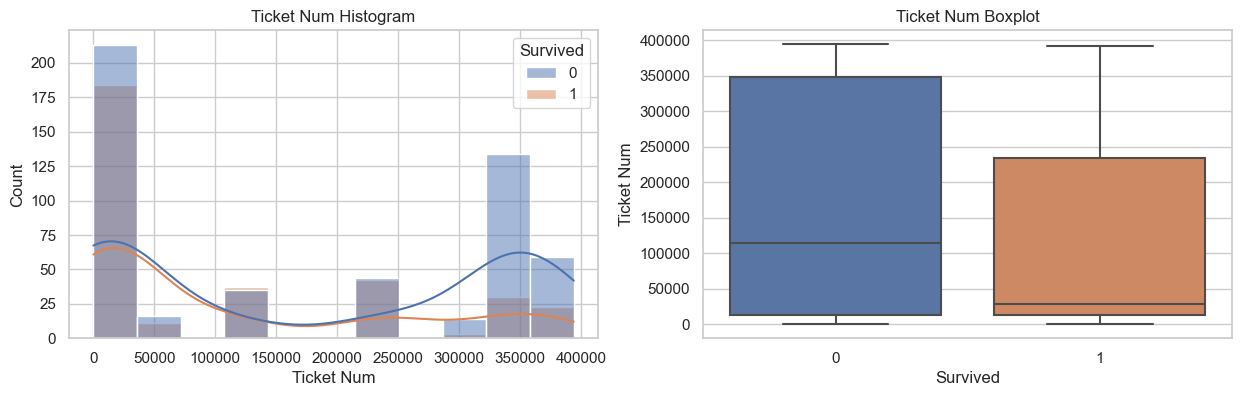

In [18]:
single_num_column_graphs("Ticket Num")

As we have removed the outliers, we cannot confidently conclude that there is a significant relationship between ticket numbers and survival. It's possible that this feature may not be important.

### Age Missing Values

Since there are some missing values and the age distribution is relatively normal, we will proceed to impute the missing values by using the median age for all those cases.

In [19]:
data['Age'].fillna(data['Age'].median(), inplace=True)

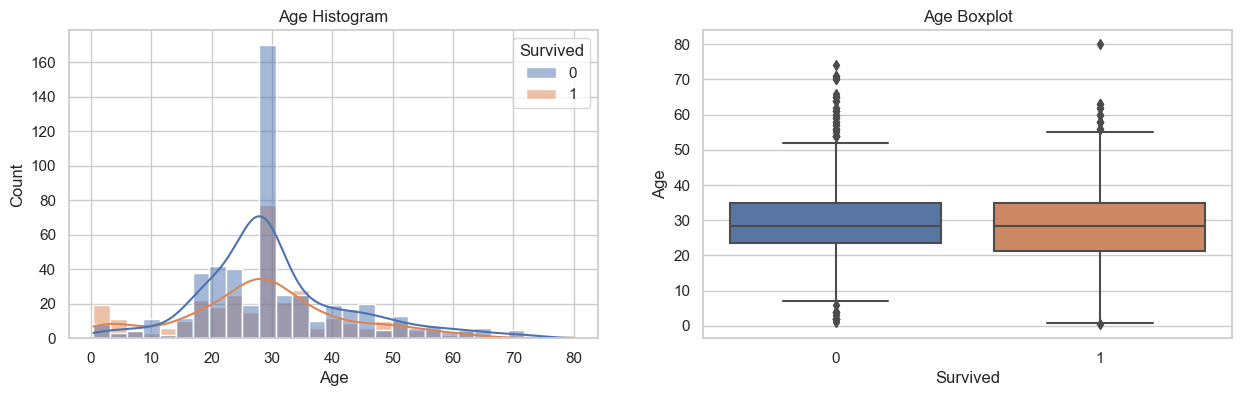

In [20]:
single_num_column_graphs("Age")

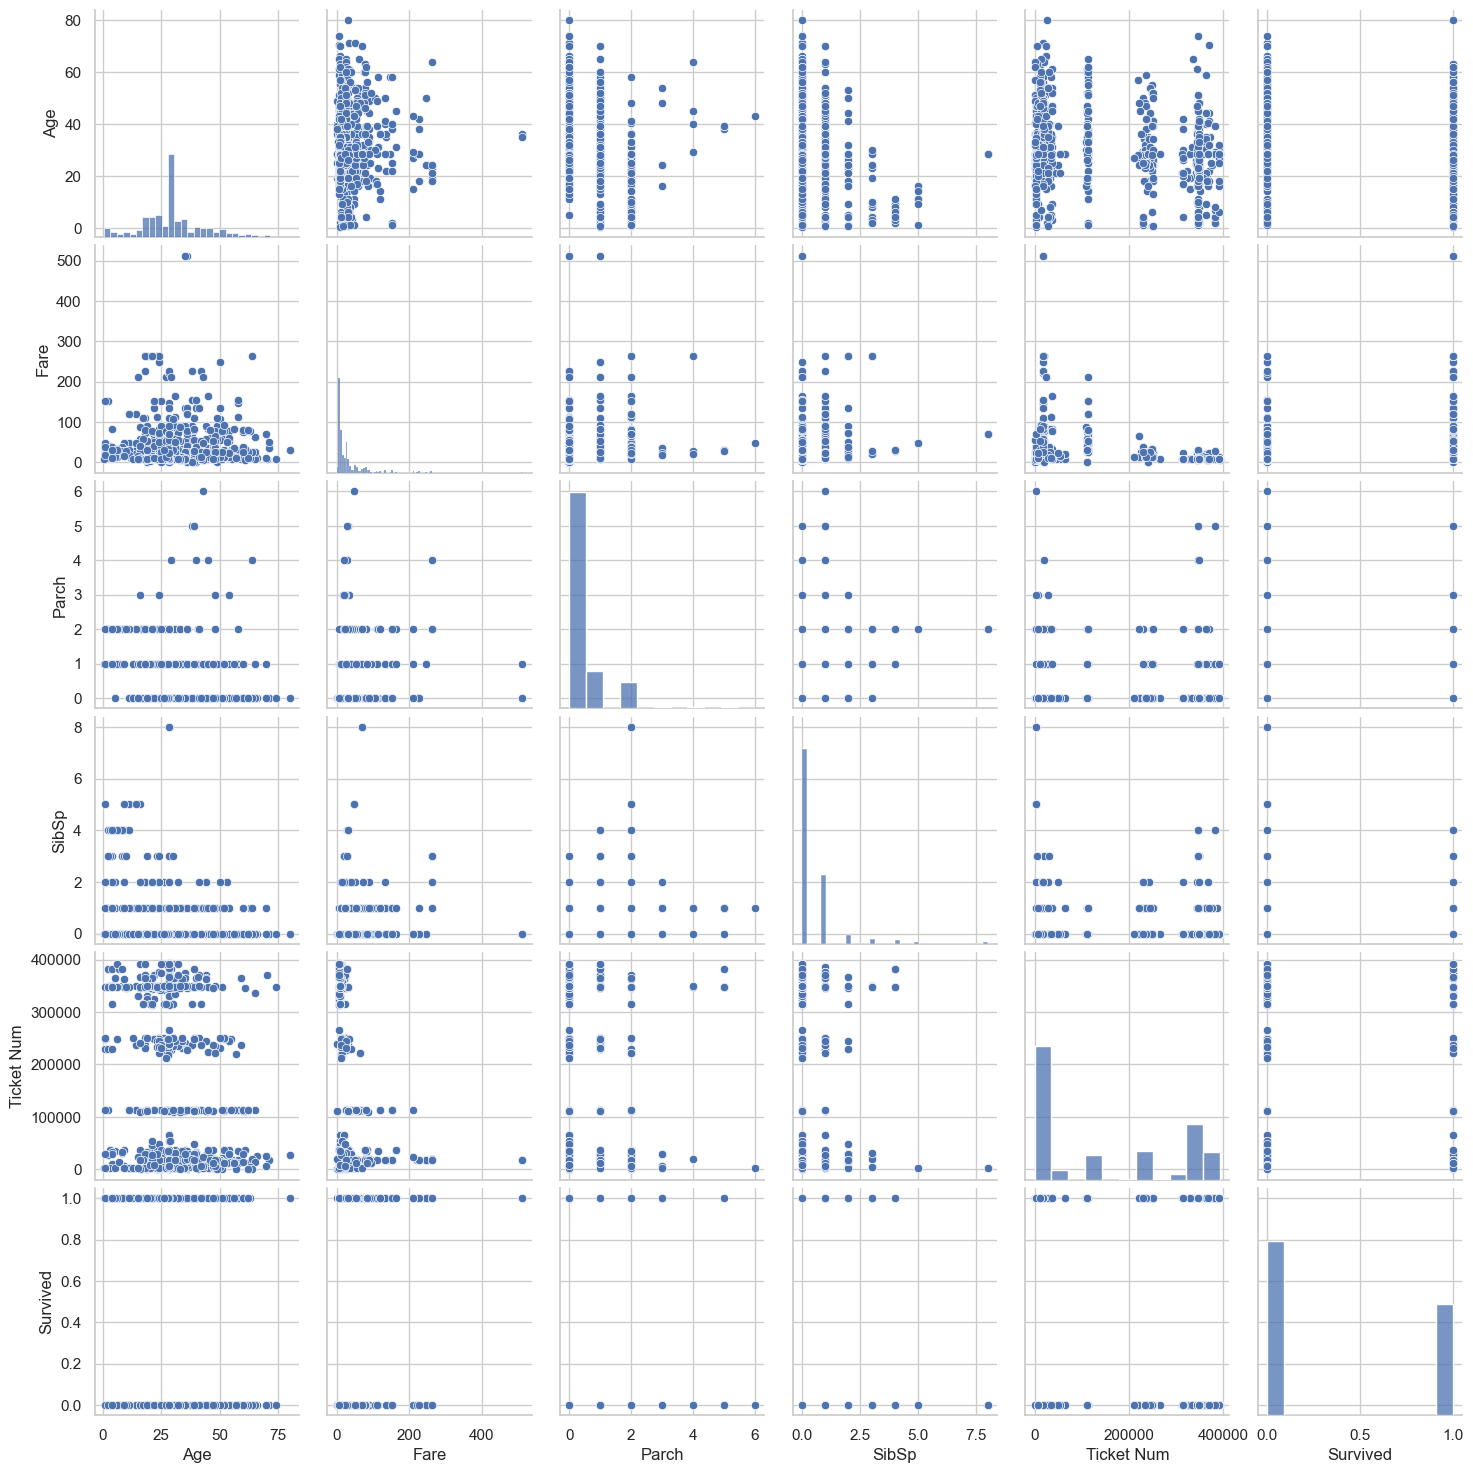

In [21]:
sns.pairplot(data.filter(items=numerical_columns))

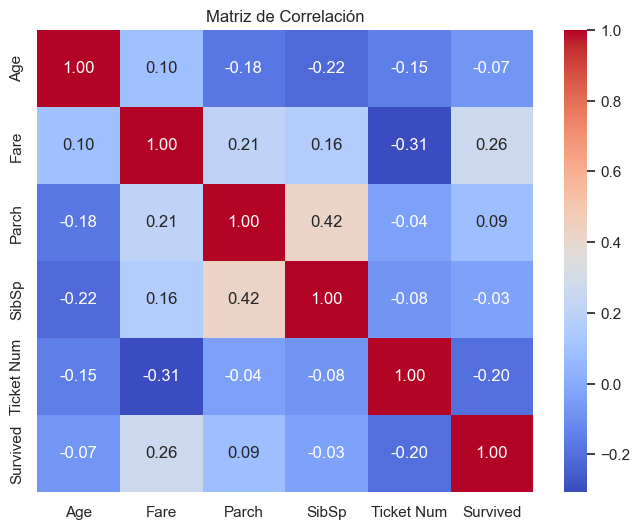

In [22]:
correlation_matrix = data.filter(numerical_columns).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

We observe a relatively low correlation between the variables, which is great as it reduces the risk of overfitting for the model.

## Categorical data transformation

#### Cabin Transform

We will transform 'Cabin' into a binary class due to the large number of NaN values.

In [23]:
data.reset_index(inplace=True, drop=True)
data["Cabin"] = data["Cabin"].fillna(0)

for i in range(len(data)):
    if data["Cabin"][i] != 0:
        data["Cabin"][i]=1
        
data["Cabin"] = data["Cabin"].astype(int)

#### Name Transform

We have observed that each name entry contains a title (e.g., Mr., Miss, etc.). This could provide useful information.

In [24]:
data["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2           Futrelle, Mrs. Jacques Heath (Lily May Peel)
3                               Allen, Mr. William Henry
4                                       Moran, Mr. James
                             ...                        
842                                Montvila, Rev. Juozas
843                         Graham, Miss. Margaret Edith
844             Johnston, Miss. Catherine Helen "Carrie"
845                                Behr, Mr. Karl Howell
846                                  Dooley, Mr. Patrick
Name: Name, Length: 847, dtype: object

In [25]:
title = []

for i in range(len(data)):
    title.append(re.findall(r'\b\w+\.\b|\b\w+\.', data["Name"][i])[0])

In [26]:
data["Title"]=title

#### Age Transform

We will divide the age category into groups to provide the model with more informative features.

In [27]:
data['Age'].fillna(data['Age'].median(), inplace=True)

bins = [-1, 12, 20, 30, 100]

labels = ["Child", "Teen",  "Young Adult", "Old Adult"]

data["Age Category"] = pd.cut(data["Age"], bins=bins, labels=labels)

#### Ticket Transform

We will get the code from the ticket numbers. There might be some information in the ticket code inself.

In [28]:
data["Ticket"]

0       A/5 21171
1        PC 17599
2          113803
3          373450
4          330877
          ...    
842        211536
843        112053
844    W./C. 6607
845        111369
846        370376
Name: Ticket, Length: 847, dtype: object

In [29]:
data["Ticket Code"] = 0

for i in range(len(data)):
    if len(data["Ticket"][i].split()) > 1:
        data["Ticket Code"][i] = 1

#### Fare Transform

We will bin the Fare into groups to provide more information to the model.

In [30]:
data['Fare'].fillna(data['Fare'].median(), inplace=True)

bins = [-1, 15, 70, 1000]

labels = ["Cheap","Medium", "Expensive"]

data["Fare Category"] = pd.cut(data["Fare"], bins=bins, labels=labels)

## Categorical Data Visualization

In [31]:
categorical_column_list = ["Pclass", "Sex", "Embarked", "Cabin", "Title", "Age Category", "Survived", "Ticket Code", "Fare Category"]

In [32]:
def plot_countplots(categorical_column_list):
    num_vars = len(categorical_column_list)
    num_rows = (num_vars + 1) // 2  
    fig, ax = plt.subplots(num_rows, 2, figsize=(15, 4 * num_rows))
    sns.set(style="whitegrid")

    for i, column in enumerate(categorical_column_list):
        row = i // 2
        col = i % 2
        sns.countplot(data=data, x=column, hue="Survived", ax=ax[row, col])
        ax[row, col].set_title(f"{column} Countplot")

    plt.tight_layout()
    plt.show()
    
    
def single_cat_column_graphs(categorical_column):
    plt.figure(figsize=(8,4))
    
    sns.set(style="whitegrid")
    
    sns.countplot(data=data, x=categorical_column, hue="Survived")
    
    plt.title(f"{categorical_column} Countplot")
    
    plt.tight_layout()
    plt.show()

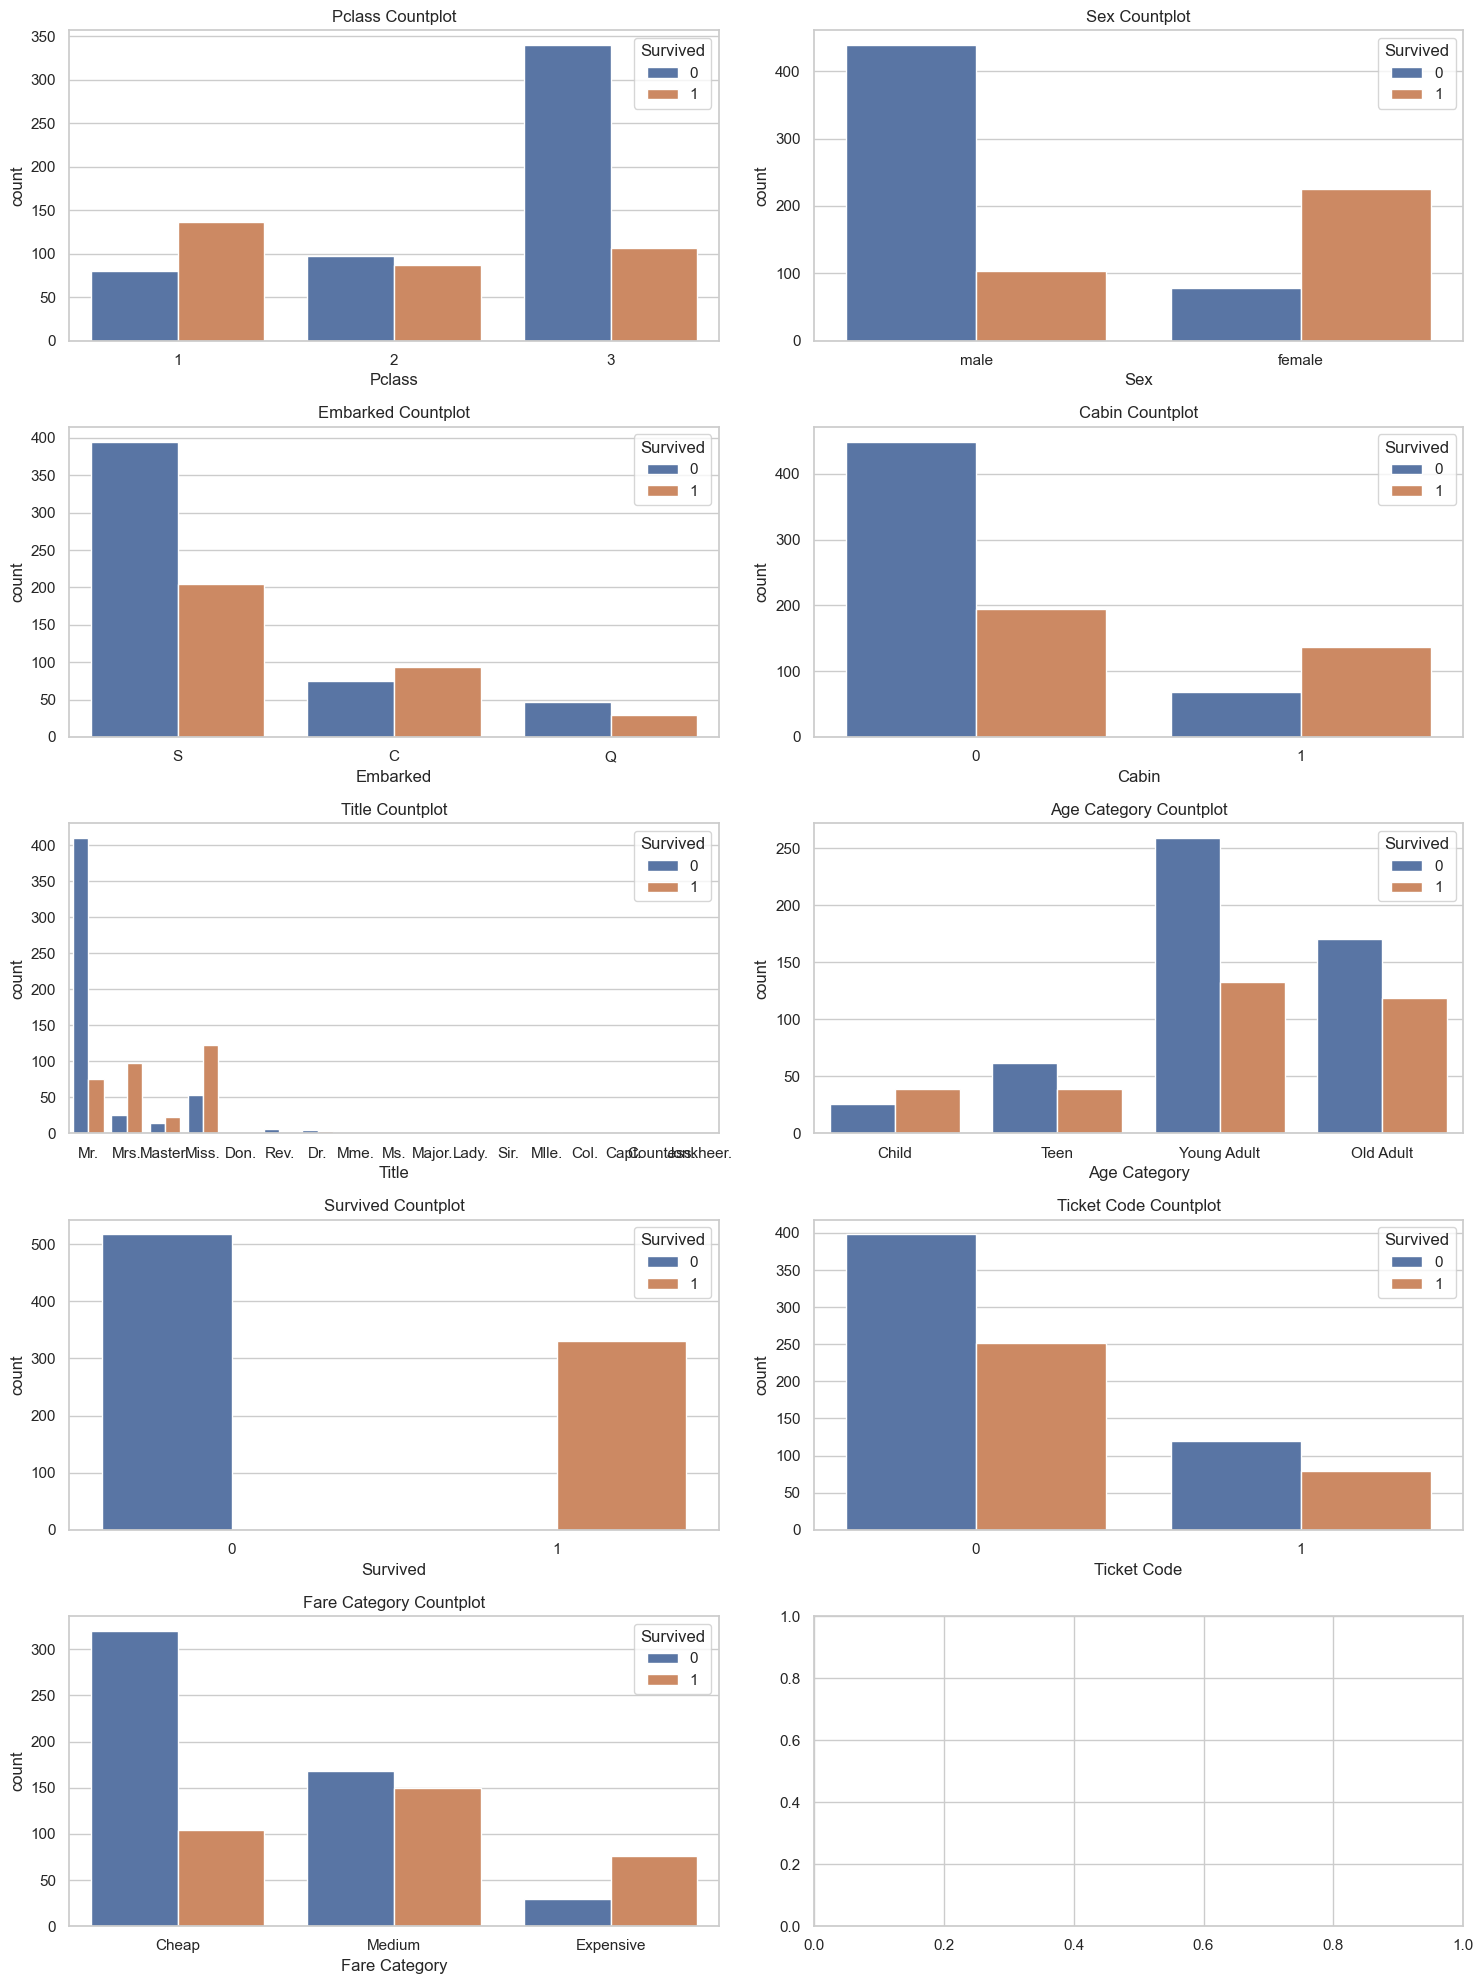

In [33]:
plot_countplots(categorical_column_list)

* The higher the Pclass, the greater the chance of survival.
* Females tend to have a higher survival rate than males.
* 'Embarked' seems have relative importance in the survival of the passenger.
* There doesn't appear to be a relationship between the presence of letters in the ticket and survival.
* We observe a correlation between whether the passenger has a cabin or not. Those who don't have a cabin tend to have a lower survival rate compared to those who have one.
* Now we have a clearer graphic after merging the titles. This might be more useful than keeping the other titles separate, especially given the low quantity of entries for those titles. Since classes other than Mr, Mrs, Miss, or Master are quite sparse, we will merge them into a single class called 'Others'.
* We observe a strong correlation between the title and survival rate. However, it's possible that the title also represents the gender (e.g., Mr. and Mrs.), so we need to visualize this relationship more clearly.
* Now we can observe a clear correlation with age, especially for individuals aged 12 or younger.
* Fare category seems to have an important correlation with the survival.

### Title Transformation 

Mr., Mrs., Miss. and master tend to have important information while the other titles dont, so every other title we will group into one single column.

In [34]:
## Mr., Mrs. and Miss. tend to be common titles, so every other title we will group into one single data
non_other = ["Mr.", "Mrs.", "Miss.", "Master."]

for i in range(len(data)):
    if data["Title"][i] not in non_other:
        data["Title"][i] = "Other"

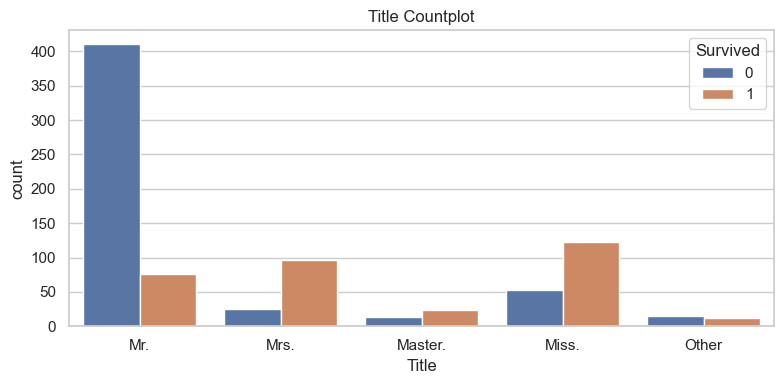

In [35]:
single_cat_column_graphs("Title")

* Mr., Mrs. and Miss. title have important correlation with the survivance, but maybe it's because they are also correlated with the sex. Wi will study this later.
* We can also notice that passengers with the title 'Master' have a notably high survival rate, which could be a valuable feature for our model.

<Axes: xlabel='Title', ylabel='count'>

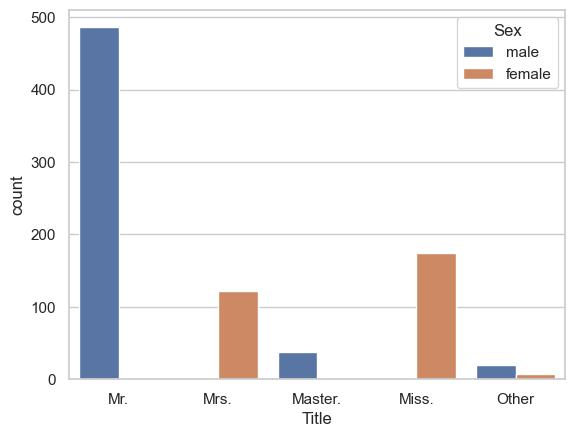

In [36]:
sns.countplot(data=data, x="Title", hue="Sex")

In fact, the titles Mr., Mrs., and Miss. are 100% correlated with their respective genders and exhibit similar survival distributions. Therefore, we must exercise caution when handling this data in our model.

## Encoding the categorical data

As we saw earlier, there is a class imbalance between the 'Survived' class and the 'Not Survived' class. We need to address this imbalance.

In [37]:
from sklearn.preprocessing import OneHotEncoder

def data_encoding(column, data):
    enc = OneHotEncoder(sparse=False)
    array = data[column].to_numpy().reshape(-1, 1)
    
    enc.fit(array)
    
    encoded_data = enc.transform(array)
    encoded_labels = enc.get_feature_names_out([column])
    
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_labels)
    
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop(columns=column)
    
    return data

In [38]:
cleanned_data = data

In [39]:
## For Sex
cleanned_data['Sex'] = cleanned_data['Sex'].map({'female': 1, 'male': 0})

In [40]:
cleanned_data = data_encoding("Embarked", cleanned_data)
cleanned_data = data_encoding("Title", cleanned_data)
cleanned_data = data_encoding("Age Category", cleanned_data)
cleanned_data = data_encoding("Fare Category", cleanned_data)

In [41]:
cleanned_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Mr.,Title_Mrs.,Title_Other,Age Category_Child,Age Category_Old Adult,Age Category_Teen,Age Category_Young Adult,Fare Category_Cheap,Fare Category_Expensive,Fare Category_Medium
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.2500,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,5,0,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.0500,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,6,0,3,"Moran, Mr. James",0,28.25,0,0,330877,8.4583,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [42]:
cleanned_data = cleanned_data.drop(columns="Embarked_nan")

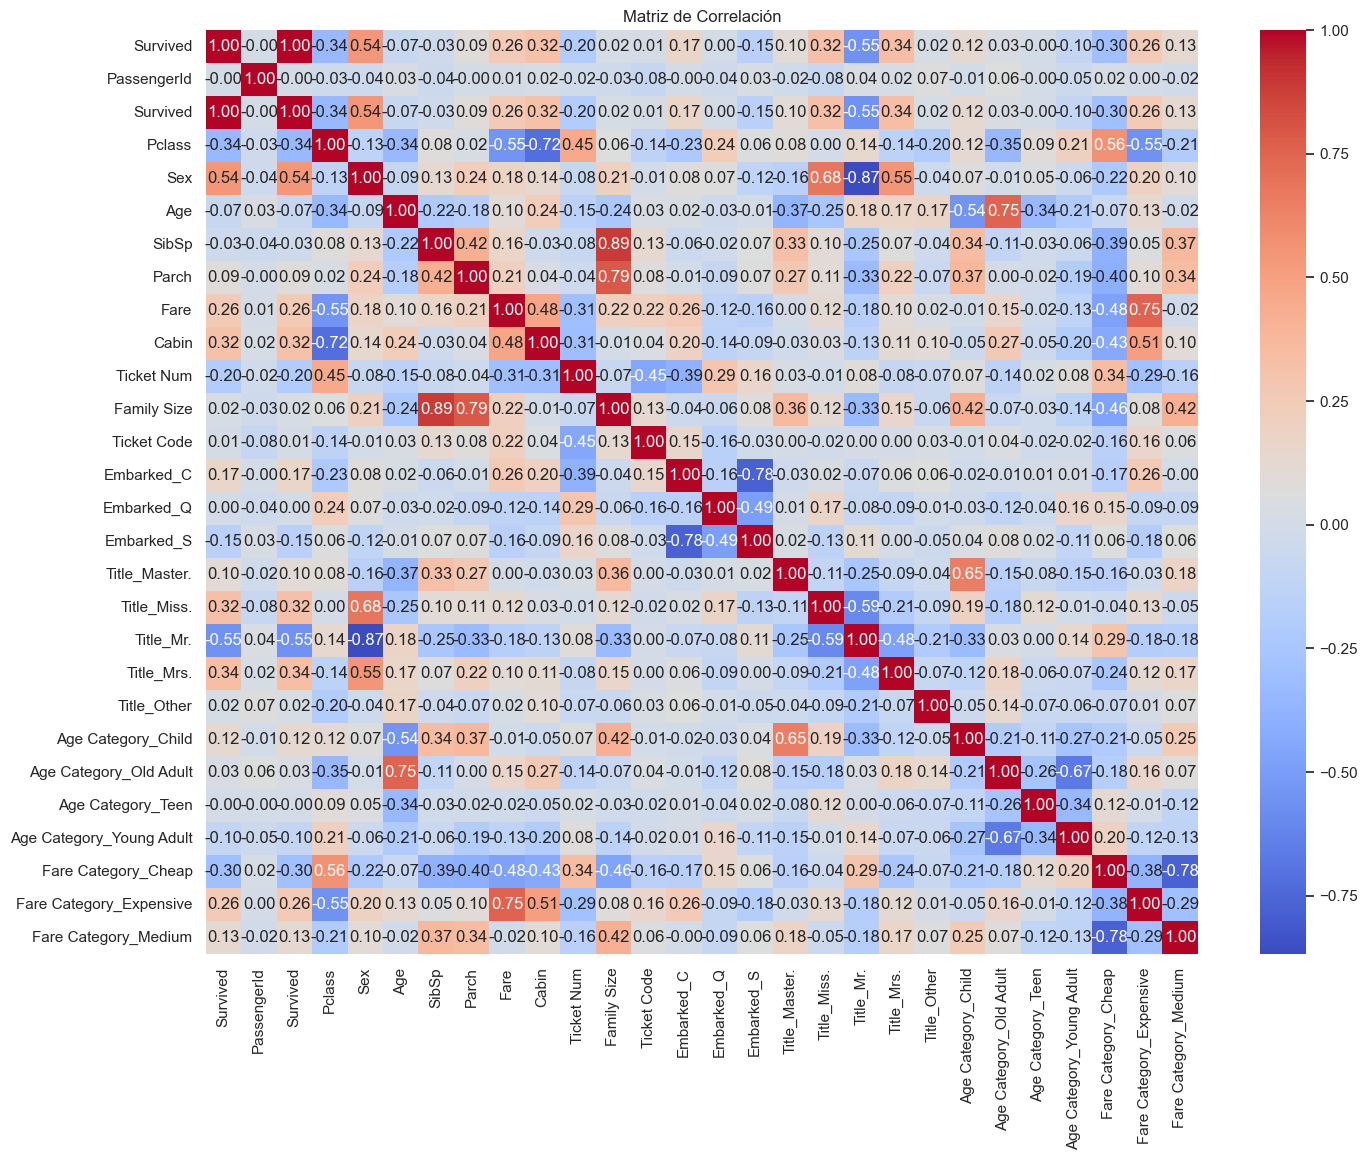

In [43]:
cleanned_data_corr = cleanned_data
cleanned_data_corr = pd.concat([cleanned_data["Survived"], cleanned_data_corr], axis=1)

correlation_matrix = cleanned_data_corr.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

* Cabin is correlated with Pclass
* Title_Mr. is correlated with Sex
* Age is correlated with Age Category_Old adult
* SibSp is correlated with Family Size
* Parch is correlated with Parch
* Fare is correlated with Fare Category_expensive
* Embarked S is correlated with embarked C

## Modeling

In [45]:
def cross_validation(model):
    k = 10

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    test_accuracy_scores = []
    test_precision_scores = []
    test_recall_scores = []
    test_f1_scores = []

    train_accuracy_scores = []
    train_precision_scores = []
    train_recall_scores = []
    train_f1_scores = []
    
    X_train_iter = []
    y_train_iter = []
    X_test_iter = []
    y_test_iter = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_train_iter.append(X_train)
        y_train_iter.append(y_train)
        
        X_test_iter.append(X_test)
        y_test_iter.append(y_test)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred)
        test_recall = recall_score(y_test, y_pred)
        test_f1 = f1_score(y_test, y_pred)

        y_pred =model.predict(X_train)

        train_accuracy = accuracy_score(y_train, y_pred)
        train_precision = precision_score(y_train, y_pred)
        train_recall = recall_score(y_train, y_pred)
        train_f1 = f1_score(y_train, y_pred)

        test_accuracy_scores.append(test_accuracy)
        test_precision_scores.append(test_precision)
        test_recall_scores.append(test_recall)
        test_f1_scores.append(test_f1)

        train_accuracy_scores.append(train_accuracy)
        train_precision_scores.append(train_precision)
        train_recall_scores.append(train_recall)
        train_f1_scores.append(train_f1)

    test_average_score = sum(test_accuracy_scores) / k
    test_precision_score = sum(test_precision_scores)/ k
    test_recall_score = sum(test_recall_scores)/ k
    test_f1_score = sum(test_f1_scores)/ k

    train_average_score = sum(train_accuracy_scores) / k
    train_precision_score = sum(train_precision_scores)/ k
    train_recall_score = sum(train_recall_scores)/ k
    train_f1_score = sum(train_f1_scores)/ k

    print(f"Test average accuracy in {k}-fold Cross-Validation: {test_average_score:.2f}")
    print(f"Test average precision in {k}-fold Cross-Validation: {test_precision_score:.2f}")
    print(f"Test average recall in {k}-fold Cross-Validation: {test_recall_score:.2f}")
    print(f"Test average F1-score in {k}-fold Cross-Validation: {test_f1_score:.2f}")
    print("-"*60)
    print(f"Train average accuracy in {k}-fold Cross-Validation: {train_average_score:.2f}")
    print(f"Train average precision in {k}-fold Cross-Validation: {train_precision_score:.2f}")
    print(f"Train average recall in {k}-fold Cross-Validation: {train_recall_score:.2f}")
    print(f"Train average F1-score in {k}-fold Cross-Validation: {train_f1_score:.2f}")
    
    cross_val_scoring = pd.DataFrame()
    cross_val_scoring["Test accuracy"] = test_accuracy_scores
    cross_val_scoring["Train accuracy"] = train_accuracy_scores
    cross_val_scoring["Test Precision"] = test_precision_scores
    cross_val_scoring["Train Precision"] = train_precision_scores
    cross_val_scoring["Test Recall"] = test_recall_scores
    cross_val_scoring["Train Recall"] = train_recall_scores
    cross_val_scoring["Test F1"] = test_f1_scores
    cross_val_scoring["Train F1"] = train_f1_scores

    return cross_val_scoring, model, X_train_iter, y_train_iter, X_test_iter, y_test_iter

def feature_importance(model):
    feature_importances = model.feature_importances_
    feature_names = X_train.columns

    feature_importances_dict = dict(zip(feature_names, feature_importances))

    sorted_feature_importances = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)

    for feature, importance in sorted_feature_importances:
        print(f"{feature}: {importance}")

In [46]:
features = ["Sex", "Pclass", "Age Category_Child",  "Family Size", "Embarked_C",
           "Title_Master.", "Fare Category_Cheap", "Fare Category_Expensive", "Title_Mrs.", "Title_Miss."]

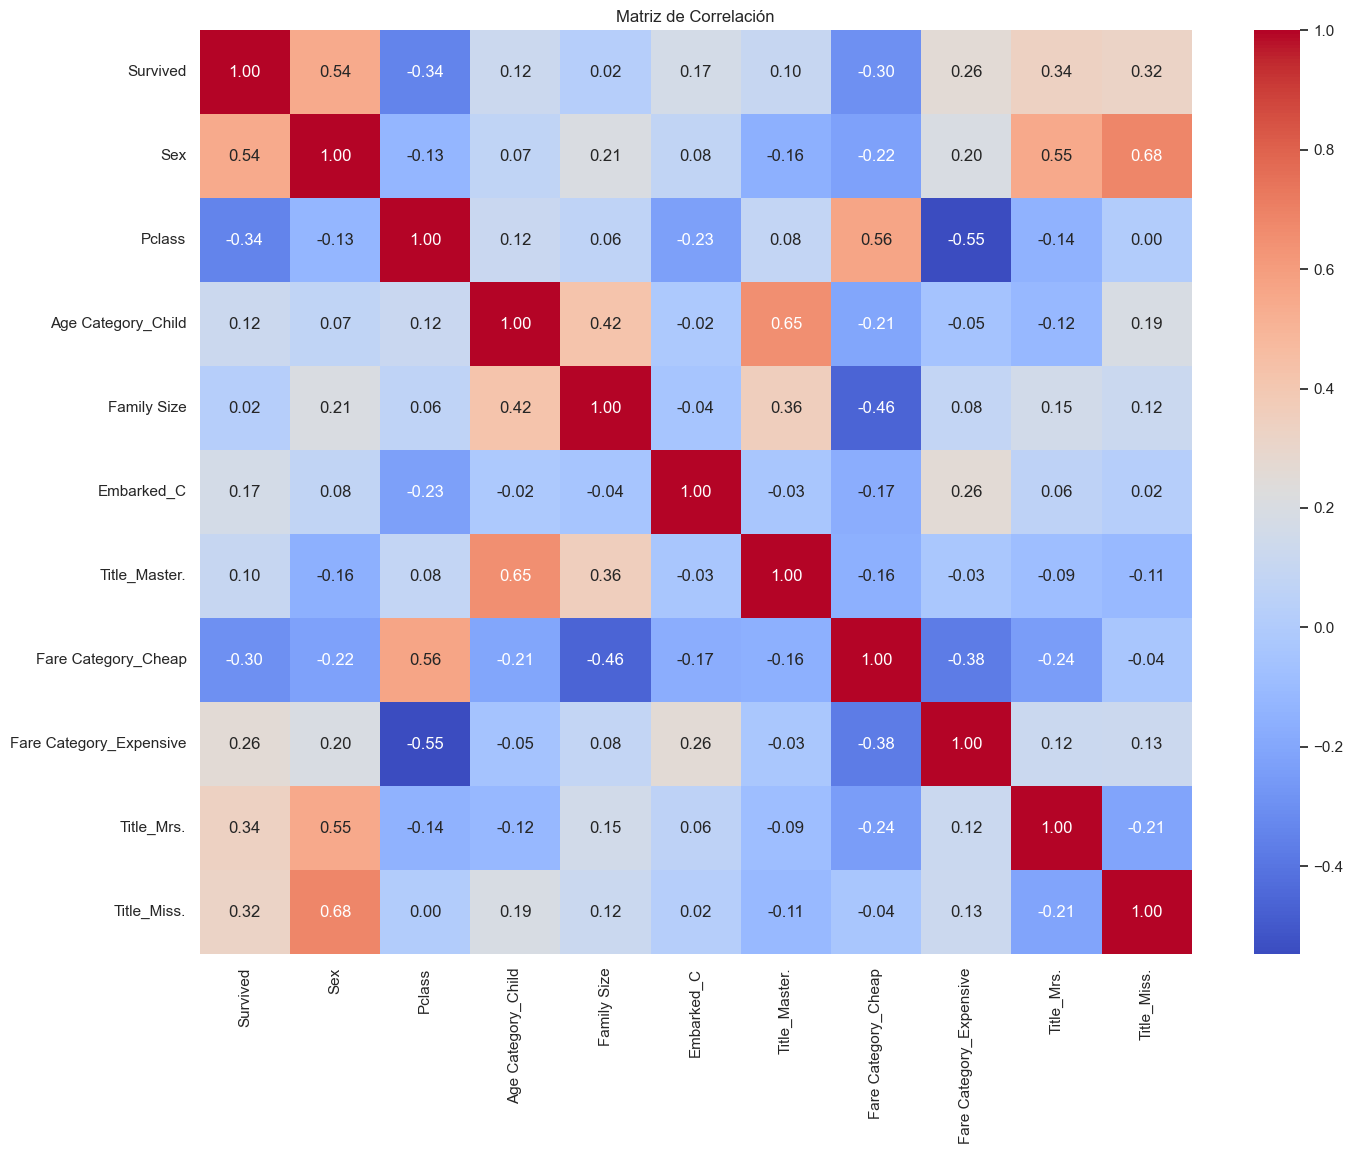

In [47]:
cleanned_data_corr = cleanned_data.filter(features)
cleanned_data_corr = pd.concat([cleanned_data["Survived"], cleanned_data_corr], axis=1)

correlation_matrix = cleanned_data_corr.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

We don't observe a high correlation between the features, so we can proceed to train the model.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [49]:
X = cleanned_data.filter(features)
y = cleanned_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=16)

In [50]:
model = RandomForestClassifier(
            n_estimators=2000,
            random_state=16,
            max_depth=5,
            min_samples_split=4,
            min_samples_leaf=3,
        )

score_table, model, X_train_final, y_train_final, X_test_final, y_test_final = cross_validation(model)

Test average accuracy in 10-fold Cross-Validation: 0.82
Test average precision in 10-fold Cross-Validation: 0.82
Test average recall in 10-fold Cross-Validation: 0.70
Test average F1-score in 10-fold Cross-Validation: 0.75
------------------------------------------------------------
Train average accuracy in 10-fold Cross-Validation: 0.84
Train average precision in 10-fold Cross-Validation: 0.83
Train average recall in 10-fold Cross-Validation: 0.74
Train average F1-score in 10-fold Cross-Validation: 0.78


In [51]:
score_table

,Test accuracy,Train accuracy,Test Precision,Train Precision,Test Recall,Train Recall,Test F1,Train F1
0,0.858824,0.830709,0.785714,0.819188,0.785714,0.735099,0.785714,0.774869
1,0.835294,0.839895,0.827586,0.835249,0.727273,0.734007,0.774194,0.781362
2,0.823529,0.838583,0.720000,0.836431,0.692308,0.740132,0.705882,0.785340
3,0.823529,0.843832,1.000000,0.854772,0.625000,0.710345,0.769231,0.775895
4,0.788235,0.841207,0.735294,0.835249,0.735294,0.736486,0.735294,0.782765
5,0.847059,0.842520,0.916667,0.847059,0.666667,0.727273,0.771930,0.782609
6,0.800000,0.841207,0.766667,0.828358,0.696970,0.747475,0.730159,0.785841
7,0.857143,0.833552,0.900000,0.808118,0.750000,0.744898,0.818182,0.775221
8,0.785714,0.838794,0.766667,0.821561,0.676471,0.746622,0.718750,0.782301
9,0.785714,0.842726,0.758621,0.828996,0.666667,0.750842,0.709677,0.787986


Of all 5 iterations of the cross validation, we will choose iteration number 5 due to its low variations and high accuracy.

In [52]:
model.fit(X_train_final[5], y_train_final[5])

y_pred = model.predict(X_test_final[5])

test_accuracy = accuracy_score(y_test_final[5], y_pred)
test_precision = precision_score(y_test_final[5], y_pred)
test_recall = recall_score(y_test_final[5], y_pred)
test_f1 = f1_score(y_test_final[5], y_pred)

print(f"Test accuracy: {test_accuracy}")
print(f"Test precision: {test_precision}")
print(f"Test recall: {test_recall}")
print(f"Test F1-score: {test_f1}")

Test accuracy: 0.8470588235294118
Test precision: 0.9166666666666666
Test recall: 0.6666666666666666
Test F1-score: 0.7719298245614035


In [53]:
y_pred = model.predict(X_train_final[5])

test_accuracy = accuracy_score(y_train_final[5], y_pred)
test_precision = precision_score(y_train_final[5], y_pred)
test_recall = recall_score(y_train_final[5], y_pred)
test_f1 = f1_score(y_train_final[5], y_pred)

print(f"Train accuracy: {test_accuracy}")
print(f"Train precision: {test_precision}")
print(f"Train recall: {test_recall}")
print(f"Train F1-score: {test_f1}")

Train accuracy: 0.84251968503937
Train precision: 0.8470588235294118
Train recall: 0.7272727272727273
Train F1-score: 0.7826086956521741


In [54]:
feature_importance(model)

Sex: 0.3632795322385636
Pclass: 0.15586853480059504
Title_Miss.: 0.1034310060650618
Title_Mrs.: 0.10001841300276879
Family Size: 0.0996626763094958
Fare Category_Cheap: 0.0552514794237587
Age Category_Child: 0.04246048419846116
Title_Master.: 0.03962441595755289
Fare Category_Expensive: 0.022936286428773368
Embarked_C: 0.017467171574968885


Our best result with Random Forest yielded an accuracy of 85% and an F1-Score of 0.8, which is quite good for the Titanic dataset.

## Applying the model to the Test Data

In [55]:
def data_transformation(data, features):
    
    # Handling missing values of age and fare
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    
    # Ticket number transformation
    data["Ticket Num"] = data["Ticket"].str.replace('[A-Za-z]', '', regex=True)
    data["Ticket Num"] = data["Ticket Num"].str.replace('[/,.]', '', regex=True)
    
    for i in range(len(data)):
        str_list = data["Ticket Num"][i].split()
        if len(str_list)==2:
            data["Ticket Num"][i] = str_list[1]
        elif len(str_list)==0:
            data["Ticket Num"][i] = 0
            
    data["Ticket Num"] = data["Ticket Num"].astype(int)
    
    # Creating Family Size column
    data["Family Size"] = data["SibSp"]+data["Parch"]
    
    # Transforming Cabin to binary categorical data
    data.reset_index(inplace=True, drop=True)
    data["Cabin"] = data["Cabin"].fillna(0)

    for i in range(len(data)):
        if data["Cabin"][i] != 0:
            data["Cabin"][i]=1
            
    data["Cabin"] = data["Cabin"].astype(int)
            
    # Getting the Title of the names
    title = []

    for i in range(len(data)):
        title.append(re.findall(r'\b\w+\.\b|\b\w+\.', data["Name"][i])[0])
        
    data["Title"]=title
    non_other = ["Mr.", "Mrs.", "Miss.", "Master."]
    
    for i in range(len(data)):
        if data["Title"][i] not in non_other:
            data["Title"][i] = "Other"
    
    # Binning age column
    bins = [-1, 12, 20, 30, 100] 
    labels = ["Child", "Teen",  "Young Adult", "Old Adult"]
    data["Age Category"] = pd.cut(data["Age"], bins=bins, labels=labels)
    

    # Binning Fare column
    bins = [-1, 15, 70, 1000]
    labels = ["Cheap","Medium", "Expensive"]
    data["Fare Category"] = pd.cut(data["Fare"], bins=bins, labels=labels)

    # Creating the Ticket Code column
    data["Ticket Code"] = 0

    for i in range(len(data)):
        if len(data["Ticket"][i].split()) > 1:
            data["Ticket Code"][i] = 1
    
    # Encoding categorical columns
            
    data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})
    data = data_encoding("Embarked", data)
    data = data_encoding("Title", data)
    data = data_encoding("Age Category", data)
    data = data_encoding("Fare Category", data)
    
    # Generating the test dataset based on the used columns
    data = data.filter(features)
    
    return data

In [56]:
test_data = pd.read_csv("./data/test.csv")

In [57]:
test_data_cleanned = data_transformation(test_data, features)

predictions = model.predict(test_data_cleanned)

output = pd.DataFrame()
output["PassengerId"] = test_data["PassengerId"]
output["Survived"] = predictions

output.to_csv("output.csv", index=False)